In [1]:
import os
from src.data_processing.data_loader import DataLoader as dt
path = os.environ.get('DATA_PATH')
data = dt(path).pre_process(multi_task=True)

Loaded data from cache: merged_data.pkl


In [2]:
data.query("`value`=='true'")

Konzernartikelnummer  \
7                 1000495289   
8                 1000415491   
13                1000041885   
15                2643067001   
16                1000056927   
...                      ...   
466121            1000165830   
466126            1000430160   
466140            1000573565   
466154            1000118288   
466166            1000386635   

                                                attribute value  \
7                                         wasservermalbar  true   
8       kann einige Tage offen liegen bleiben ohne ein...  true   
13                                 Spitze voll versenkbar  true   
15                                            nachfüllbar  true   
16                                 geeignet für Schablone  true   
...                                                   ...   ...   
466121                                   Garantie gewährt  true   
466126                                     Clip vorhanden  true   
466140                                    Griff vorhanden  true   
466154                                          stapelbar  true   
466166  kann einige Tage offen liegen bleiben ohne ein...  true   

                                                     text  
7       künstlerstift aquarell monolith französisch gr...  
8       rollerball sport fan becrazy stabilo be you b ...  
13      druckstift grip 1347 grünmetallic 0.7 faber ca...  
15      boardmarker blau tz 140 3 legamaster 114003 sp...  
16      fineliner 20 st 0.3 mm box 0.3 mm pelikan 9406...  
...                                                   ...  
466121  heftzange weiß leitz 5547 00 04 metall blau fü...  
466126  druckstift 0.7 weiß grip plus faber castell 13...  
466140  weihngeschenktragtasche kugeldeko 223 507 tq 1...  
466154  briefablage transparent rot combo exacompta 11...  
466166  tintenroller easyoriginal blau start r stabilo...  

[61035 rows x 4 columns]

In [159]:
data[data['attribute'].str.contains("Anzahl") & data['attribute'].str.contains("je")].iloc[2]['text']

'haftetiketten 13 x 50 weiß movables herma 10606 selbstklebende vielzwecketiketten aus hochwertigem schreibpapier </s> kennzeichnen und beschriften besonders einfach sicher und flexibel </s> durch die free to move beschichtung haften herma movables sicher auf allen glatten trockenen unbeschädigten und staubfreien flächen sind rückstandsfrei wieder abziehbar ohne den untergrund zu beschädigen sowie problemlos repositionierbar und mehrfach wieder haftend </s> ideal zur flexiblen beschriftung für zeitlich befristete oder wechselnde kennzeichnungen und oberflächen die nicht beschädigt werden dürfen </s> aus chlorfrei gebleichtem zellstoff lösemittelfreier haftkleber </s> zum beschriften mit allen schreibgeräten </s> abgerundete ecken vorhanden </s> blattgröße 111 x 156 mm </s> größe b x h 13 x 40 mm </s> farbe weiß </s> etiketten blatt 21 </s> blatt packung 32 </s> etiketten packung 672 </s>'

In [116]:
data.query("`value`=='true' and `attribute`=='Garantie gewährt'")['text'].iloc[0]

'sichttafel 5 stück a 3 h gelb standard tarifold ta 133504 sichttafel standard </s> aus strapazierfähigem flexiblem pvc mit farbigem kunststoffummanteltem stahldraht gerahmt </s> reflexfrei </s> öffnung oben </s> auch für revo drehständer 560300 und 560310 geeeignet </s> verwendung für papierformate din a 3 </s> garantiedauer 10 jahre </s> farbe des rahmens gelb </s> packung mit 5 stück </s>'

In [3]:
data.query("`value`=='true' and `attribute`=='Clip vorhanden'")['text'].iloc[0]

'kugelschreiber m rodo soft erase grün ballograf 14832001 gummierter schaft in vier farben schaftfarbe schreibfarbe rutschfest massiver stahlclip und hochglänzend polierte beschläge </s> langlebiger radierer auf silikonbasis am drücker damit kann die thermosensitive soft tinte wegradiert werden </s> lebenslange garantie auf die druckmechanik </s> gewicht 18 g </s> made in eu </s> strichstärke m </s> farbe grün </s>'

In [4]:
context=data.query("`value`=='true' and `attribute`=='Clip vorhanden'")['text'].iloc[0]

In [89]:
input="Frage: Anzahl der Blätter je Packung? Kontext: haftetiketten 13 x 50 weiß movables herma 10606 selbstklebende vielzwecketiketten aus hochwertigem schreibpapier</s> etiketten blatt 21</s> blatt packung 32</s> etiketten packung 672</s>"

In [90]:
from transformers import T5ForConditionalGeneration, T5TokenizerFast
model_id = "LORA_2023103114"
model = T5ForConditionalGeneration.from_pretrained(f"models/{model_id}", output_attentions=True)
tokenizer = T5TokenizerFast.from_pretrained(f"models/tokenizer_{model_id}")
encoder_input_ids = tokenizer(input, return_tensors="pt").input_ids #, add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("32", return_tensors="pt").input_ids #, add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

In [91]:
encoder_text

['▁Frage',
 ':',
 '▁Anzahl',
 '▁der',
 '▁Blätter',
 '▁je',
 '▁Pack',
 'ung',
 '?',
 '▁Kon',
 'text',
 ':',
 '▁',
 'hafte',
 'tik',
 'ette',
 'n',
 '▁13',
 '▁',
 'x',
 '▁50',
 '▁weiß',
 '▁',
 'mov',
 'able',
 's',
 '▁her',
 'm',
 'a',
 '▁',
 '106',
 '06',
 '▁selbst',
 'k',
 'leben',
 'de',
 '▁viel',
 'zweck',
 'e',
 'tik',
 'ette',
 'n',
 '▁aus',
 '▁hochwertige',
 'm',
 '▁',
 'schreib',
 'papier',
 '</s>',
 '▁',
 'e',
 'tik',
 'ette',
 'n',
 '▁',
 'blatt',
 '▁21',
 '</s>',
 '▁',
 'blatt',
 '▁pack',
 'ung',
 '▁32',
 '</s>',
 '▁',
 'e',
 'tik',
 'ette',
 'n',
 '▁pack',
 'ung',
 '▁6',
 '72',
 '</s>',
 '</s>']

In [92]:
decoder_text

['▁32', '</s>']

In [93]:
import torch
input_tensor=outputs.cross_attentions[11]
input_tensor=torch.mean(input_tensor, dim=1).squeeze()
input_tensor

tensor([[1.8080e-03, 5.3279e-02, 6.4110e-04, 1.4103e-03, 1.5064e-02, 1.8206e-03,
         1.6025e-03, 1.7569e-04, 1.2280e-03, 6.8757e-04, 4.9922e-04, 2.8894e-02,
         3.2703e-04, 9.3080e-05, 2.2004e-04, 6.3070e-05, 2.9451e-05, 6.4069e-05,
         1.5702e-05, 4.9351e-05, 1.5686e-04, 2.1640e-04, 9.3742e-05, 5.2562e-04,
         1.4730e-05, 9.9463e-06, 1.1232e-04, 3.4815e-05, 1.9971e-05, 1.2506e-05,
         4.8604e-05, 6.9762e-05, 4.3219e-03, 1.5235e-04, 2.6560e-04, 1.4115e-04,
         4.3481e-04, 4.4377e-04, 6.3205e-04, 1.6349e-03, 2.9783e-04, 1.7714e-04,
         1.6502e-04, 2.2521e-04, 7.2615e-05, 2.5687e-04, 3.7979e-04, 5.4197e-04,
         1.6738e-01, 2.4261e-04, 1.1262e-03, 1.9746e-04, 4.2313e-04, 6.8524e-04,
         7.5837e-04, 1.3860e-02, 1.8311e-03, 1.5712e-01, 1.8634e-03, 2.4778e-02,
         1.7371e-03, 9.4465e-05, 5.2522e-04, 1.6508e-01, 6.6094e-04, 2.6807e-03,
         6.1705e-04, 7.3219e-04, 1.8077e-03, 1.4608e-03, 8.7806e-05, 1.1218e-03,
         6.6968e-04, 1.6734e

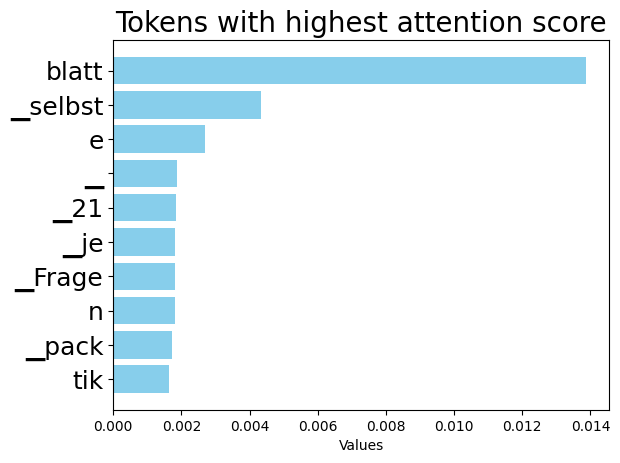

In [95]:
import numpy as np
import matplotlib.pyplot as plt

top_indices = np.argsort(input_tensor[0])[-19:]
top_indices=top_indices[:10]
top_values = input_tensor[0][top_indices]
top_tokens = [encoder_text[i] for i in top_indices]
plt.barh(top_tokens, top_values, color='skyblue')
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('Values')
#plt.ylabel('Tokens', fontsize=18)
plt.title('Tokens with highest attention score', fontsize=20)


plt.savefig("anzahl.png", bbox_inches='tight')
plt.show()


In [95]:
Q_LEN = 512
import torch
def inference(context):
        prompt="Kontext: '{}'Frage: '{}'?, "
        task_prefix = "Beantworten Sie die folgende Frage basierend aud dem Kontext: \n"
        question="Anzahl der Blätter je Packung?"
        input_text = task_prefix + prompt.format(context, question)
        question_tokenized = tokenizer(input_text,
                                       max_length=Q_LEN,
                                       padding="max_length",
                                       truncation=True,
                                       pad_to_max_length=True,
                                       add_special_tokens=True)
        with torch.no_grad():
            input_ids = torch.tensor(question_tokenized["input_ids"], dtype=torch.long).cpu().unsqueeze(0)
            attention_mask = torch.tensor(question_tokenized["attention_mask"], dtype=torch.long).cpu().unsqueeze(
                0)
            outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)
            predicted_answer = tokenizer.decode(outputs.flatten(), skip_special_tokens=True)
        return predicted_answer

In [96]:
context="haftetiketten 13 x 50 weiß movables herma 10606 selbstklebende vielzwecketiketten aus hochwertigem schreibpapier </s> kennzeichnen und beschriften besonders einfach sicher und flexibel </s> durch die free to move beschichtung haften herma movables sicher auf allen glatten trockenen unbeschädigten und staubfreien flächen sind rückstandsfrei wieder abziehbar ohne den untergrund zu beschädigen sowie problemlos repositionierbar und mehrfach wieder haftend </s> ideal zur flexiblen beschriftung für zeitlich befristete oder wechselnde kennzeichnungen und oberflächen die nicht beschädigt werden dürfen </s> aus chlorfrei gebleichtem zellstoff lösemittelfreier haftkleber </s> zum beschriften mit allen schreibgeräten </s> abgerundete ecken vorhanden </s> blattgröße 111 x 156 mm </s> größe b x h 13 x 40 mm </s> farbe weiß </s> etiketten blatt 21 </s> blatt packung 32 </s> etiketten packung 672 </s>"
inference(context)

/root/master_thesis/thesis-amel-gader/venv/lib/python3.9/site-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'32'

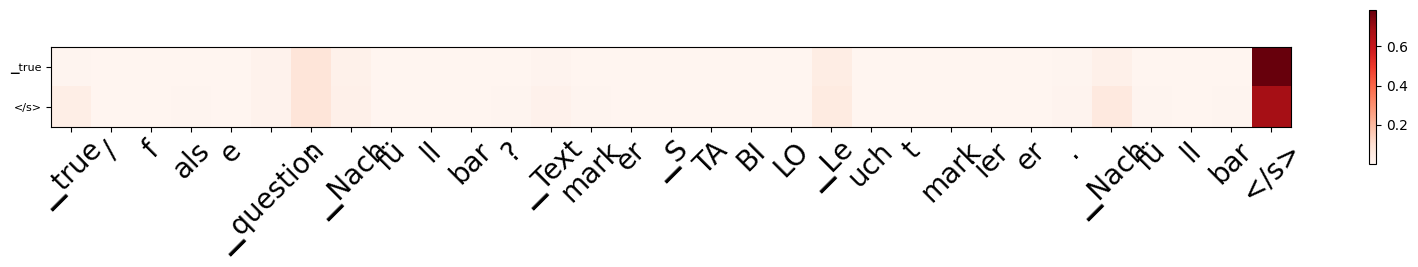

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 2))
tensor_array = input_tensor.numpy()

plt.imshow(tensor_array, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(encoder_text)),encoder_text, rotation=45, fontsize=20)
plt.yticks(range(len(decoder_text)), decoder_text, fontsize=8)
plt.colorbar()
plt.show()

In [5]:
from bertviz import model_view, head_view

head_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens = decoder_text
)

<IPython.core.display.Javascript object>

In [33]:
import shap
explainer = shap.Explainer(inference, tokenizer)

In [35]:
inference(["Textmarker STABILO 7006 Leuchtmarkierer STABILO® BOSS® ORIGINAL. Nachfüllbar. Strichstärke: 2 - 5 mm. Art der Schreibflüssigkeit: Tinte auf Wasserbasis, lichtbeständig. Tintenspeicher-Technik: Kapillarspeicher. Große Leuchtkraft und lange Lebensdauer, hohe Offenlagerungsfähigkeit. Farbe des Schaftes: in Schreibfarbe. Farbe: gelb, blau, grün, pink, rot, orange. Ausführung des Inhalts mit Packung: Rundbox mit 6 Stiften"])

'true'

In [42]:
!pip install nlp

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 1.7 MB 4.7 MB/s eta 0:00:01


In [45]:
input={'label':["true"],
 'text':["Textmarker STABILO 7006 Leuchtmarkierer STABILO® BOSS® ORIGINAL. Nachfüllbar. Strichstärke: 2 - 5 mm. Art der Schreibflüssigkeit: Tinte auf Wasserbasis, lichtbeständig. Tintenspeicher-Technik: Kapillarspeicher. Große Leuchtkraft und lange Lebensdauer, hohe Offenlagerungsfähigkeit. Farbe des Schaftes: in Schreibfarbe. Farbe: gelb, blau, grün, pink, rot, orange. Ausführung des Inhalts mit Packung: Rundbox mit 6 Stiften"]}

In [60]:
model = T5ForConditionalGeneration.from_pretrained(f"models/{model_id}").cpu()#, output_attentions=True)
tokenizer = T5TokenizerFast.from_pretrained(f"models/tokenizer_{model_id}")

s = [
    "Textmarker STABILO 7006 Leuchtmarkierer STABILO® BOSS® ORIGINAL. Nachfüllbar. Strichstärke: 2 - 5 mm. Art der Schreibflüssigkeit: Tinte auf Wasserbasis, lichtbeständig. Tintenspeicher-Technik: Kapillarspeicher. Große Leuchtkraft und lange Lebensdauer, hohe Offenlagerungsfähigkeit. Farbe des Schaftes: in Schreibfarbe. Farbe: gelb, blau, grün, pink, rot, orange. Ausführung des Inhalts mit Packung: Rundbox mit 6 Stiften"
]

explainer = shap.Explainer(model, tokenizer)

shap_values = explainer(s)

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.75s/it]                                                                                                                                   


In [61]:
shap.plots.text(shap_values)
